### Week 4 Individual Coding Assignment 
By: Michelle Gallarza

This week is an attempt to start overlaying various factors applicable to the Extreme Heat in LA project, specifically disadvantaged communities and cooling center locations in Los Angeles city. The goal is to eventually create an overlay map with disadvantaged census tracts and cooling center locations within LA city boundaries.



First, I'll import pandas and geopandas.

In [23]:
import pandas as pd
import geopandas as gpd

Then I'll read my file on SB 535 disadvantaged communities in the city of Los Angeles.

In [24]:
df = pd.read_csv('data/SB535_DAC_2022_LACity.csv')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 565 non-null    int64  
 1   Total Population             565 non-null    int64  
 2   California County            565 non-null    object 
 3   ZIP                          565 non-null    int64  
 4   Approximate Location         565 non-null    object 
 5   Longitude                    565 non-null    float64
 6   Latitude                     565 non-null    float64
 7   CES 4.0 Score                561 non-null    float64
 8   CES 4.0 Percentile           561 non-null    float64
 9   CES 4.0 Percentile Range     561 non-null    object 
 10  DAC category                 565 non-null    object 
 11  Ozone                        565 non-null    float64
 12  Ozone Pctl                   565 non-null    float64
 13  PM2.5               

Next, I want to see all the column headers to view the full range of data.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
df.head(5)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,DAC category,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Lead,Lead Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,06037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),CalEnviroScreen 4.0 Top 25%,0.048,53.73,12.251640,89.21,0.781,96.55,787.94,92.53,92.56,98.40,0.0,0.00,3682.693278,87.73,2522.622269,92.84,38.75,92.96,20.50,68.92,11.620,99.66,7,66.74,4.85,73.08,77.67,9.48,99.86,76.10,82.76,7.11,90.89,20.87,90.15,52.2,97.39,17.1,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
1,06037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,77.35,99.87,95-100% (highest scores),CalEnviroScreen 4.0 Top 25%,0.049,59.69,12.576875,91.57,1.053,98.41,798.87,93.57,74.68,84.31,0.0,0.00,1894.993347,78.08,2125.866346,88.83,16.80,77.70,47.55,89.41,2.090,92.80,13,91.87,0.50,22.08,74.46,9.09,99.45,65.53,74.85,6.16,78.36,13.45,57.13,52.1,97.33,28.4,94.87,71.7,97.95,11.9,91.94,28.3,87.49,82.01,8.51,94.49
2,06037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,77.25,99.86,95-100% (highest scores),CalEnviroScreen 4.0 Top 25%,0.041,24.88,12.066061,82.35,0.637,94.08,805.57,94.04,66.07,74.22,66.5,74.14,19774.789710,99.52,3455.239256,97.63,16.00,76.73,37.55,84.71,7.280,98.84,16,96.26,4.20,70.90,81.90,10.00,100.00,64.77,74.05,7.77,95.43,12.99,53.75,31.6,81.93,20.1,86.75,51.5,83.49,4.5,37.71,26.1,82.79,74.47,7.73,86.01
3,06037243100,6772,Los Angeles,90059,Los Angeles,-118.235093,33.932796,76.85,99.84,95-100% (highest scores),CalEnviroScreen 4.0 Top 25%,0.044,35.16,12.090237,83.73,0.805,96.76,787.94,92.53,75.63,85.29,0.0,0.00,8878.613322,96.72,2484.965675,92.41,16.90,77.77,13.15,54.66,1.220,88.10,0,0.00,0.20,9.67,63.90,7.80,94.95,129.20,97.10,9.48,99.23,26.48,98.63,44.8,93.48,12.4,69.79,73.5,98.45,15.6,97.27,41.2,99.00,94.96,9.85,99.91
4,06037227010,5705,Los Angeles,90011,Los Angeles,-118.246997,34.018526,76.65,99.82,95-100% (highest scores),CalEnviroScreen 4.0 Top 25%,0.046,46.99,12.099405,84.39,0.565,91.89,787.94,92.53,95.59,99.57,0.0,0.00,2762.896647,83.81,832.561620,46.50,53.15,96.40,4.55,27.78,3.065,96.24,7,66.74,7.25,83.92,70.21,8.57,98.52,68.48,77.37,5.57,66.05,21.83,93.28,63.2,99.62,28.3,94.79,68.6,96.86,8.4,77.76,39.5,98.44,86.20,8.94,97.37


Since I don't yet know which data I will explore for this projet, I will refrain from trimming the data for now. 

I need to convert my Census Tract column to objects to resolve the missing zero issue.

In [28]:
df = pd.read_csv(
    'data/SB535_DAC_2022_LACity.csv',
    dtype=
    {
        'Census Tract':str,

    }
)

Running a sample to check my work:

In [29]:
df.sample(5)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,DAC category,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Lead,Lead Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
309,06037115403,3583,Los Angeles,91325,Los Angeles,-118.531730,34.224734,49.97,87.85,85-90%,CalEnviroScreen 4.0 Top 25%,0.064,91.05,12.583350,91.66,0.104,38.66,726.64,83.13,67.86,76.37,0.0,0.00,565.900665,53.96,1220.348247,69.44,9.00,58.17,26.00,75.98,0.660,77.02,3,33.16,0.00,0.00,58.31,7.12,88.50,46.93,51.97,7.75,95.34,13.12,54.79,23.0,69.92,15.4,78.20,48.7,80.41,3.0,17.11,32.7,94.16,67.66,7.02,76.83
554,06037234000,5417,Los Angeles,90008,Los Angeles,-118.321487,34.012087,34.72,67.11,65-70%,CalEnviroScreen 3.0 Disadvantaged Communities ...,0.045,39.99,11.962753,76.42,0.075,28.20,787.94,92.53,83.25,92.17,0.0,9.83,2579.794006,82.95,720.546039,37.88,0.50,7.71,4.05,26.30,0.200,35.62,0,0.00,0.00,0.00,42.97,5.25,51.40,78.95,84.51,10.88,99.87,11.21,39.64,17.3,60.31,9.4,59.37,34.2,60.45,2.7,13.18,22.2,71.15,63.78,6.62,71.10
524,06037190700,2685,Los Angeles,90028,Los Angeles,-118.333672,34.098663,39.91,74.85,70-75%,CalEnviroScreen 3.0 Disadvantaged Communities ...,0.050,62.53,11.906775,73.40,0.285,74.76,787.94,92.53,54.21,57.48,0.0,0.00,1403.615011,71.51,1400.536652,75.45,5.90,44.77,39.40,85.67,0.685,77.80,0,0.00,0.75,25.73,57.90,7.07,87.64,60.77,69.98,2.92,8.29,13.63,58.14,10.3,43.07,18.0,83.35,40.4,69.72,5.2,46.99,22.9,73.73,54.42,5.65,56.77
43,06037204820,2241,Los Angeles,90023,Los Angeles,-118.205841,34.023816,68.04,98.60,95-100% (highest scores),CalEnviroScreen 4.0 Top 25%,0.048,53.73,12.240944,89.14,0.579,92.31,787.94,92.53,81.05,90.23,0.0,0.00,3039.246664,84.96,3550.700079,97.86,24.15,85.67,7.80,39.90,8.005,98.98,7,66.74,1.00,35.72,71.86,8.77,98.97,76.10,82.76,4.91,49.91,20.87,90.15,44.9,93.61,23.0,90.24,59.4,91.27,2.5,10.66,29.9,90.41,74.76,7.75,86.40
386,06037238400,4694,Los Angeles,90047,Los Angeles,-118.308992,33.956349,46.04,83.28,80-85%,CalEnviroScreen 4.0 Top 25%,0.043,32.15,12.052452,81.29,0.084,31.41,787.94,92.53,73.92,83.49,0.0,0.00,5278.120117,92.99,976.397261,56.40,9.00,58.17,24.50,73.97,0.300,50.14,0,0.00,0.00,0.00,51.34,6.27,73.70,122.94,96.19,10.75,99.85,17.75,79.71,10.3,43.07,1.8,14.28,30.9,55.24,5.2,46.99,29.0,88.87,70.80,7.34,81.10


The conversion was a success. Leading zeros are now visible.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 565 non-null    object 
 1   Total Population             565 non-null    int64  
 2   California County            565 non-null    object 
 3   ZIP                          565 non-null    int64  
 4   Approximate Location         565 non-null    object 
 5   Longitude                    565 non-null    float64
 6   Latitude                     565 non-null    float64
 7   CES 4.0 Score                561 non-null    float64
 8   CES 4.0 Percentile           561 non-null    float64
 9   CES 4.0 Percentile Range     561 non-null    object 
 10  DAC category                 565 non-null    object 
 11  Ozone                        565 non-null    float64
 12  Ozone Pctl                   565 non-null    float64
 13  PM2.5               

Next, I want to see all disadvantaged census tracts in LA city. I will load a geojson file for LA County because I am able to merge the two files by census tracts.

In [34]:
lac=gpd.read_file('data/Census_Tracts_2020-Copy1.geojson')
lac.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


I trim the data to include census tract and geometry columns.

In [36]:
lac = lac[['CT20','geometry']]
lac.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


Then I add complete FIPS information for California and Los Angeles County to create a new column titled "Census Tracts"

In [40]:
lac['Census Tract']='06'+'037' + lac['CT20']

In [41]:
lac.head()

,CT20,geometry,FIPS,Census Tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,06037101222


Next, I'm able to merge the LA county geojson file with the LA city disadvantaged communities csv file under the "Census Tract" column.

In [42]:
lac_dac=lac.merge(df,on="Census Tract")

Checking my work:

In [70]:
lac_dac.head(10)

,CT20,geometry,FIPS,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,DAC category,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Lead,Lead Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,102105,"POLYGON ((-118.34374 34.20760, -118.34392 34.2...",06037102105,06037102105,1905,Los Angeles,91505,Los Angeles,-118.349264,34.209871,47.82,85.27,85-90%,CalEnviroScreen 4.0 Top 25%,0.062,88.7,11.563881,62.51,0.601,92.99,776.14,87.14,72.71,82.08,0.00,0.00,1878.586670,77.91,2648.113091,93.74,40.70,93.65,47.60,89.44,0.845,82.41,6,58.69,0.0,0.00,70.37,8.59,98.58,31.70,28.24,5.60,66.83,7.37,9.53,20.2,65.20,NaN,NaN,40.8,70.34,5.8,55.02,41.9,99.15,53.65,5.57,55.48
1,104103,"POLYGON ((-118.39269 34.28638, -118.39379 34.2...",06037104103,06037104103,3431,Los Angeles,91342,Los Angeles,-118.392576,34.282099,35.39,68.17,65-70%,CalEnviroScreen 3.0 Disadvantaged Communities ...,0.067,97.0,11.246682,57.40,0.279,74.14,726.64,83.13,50.29,51.96,0.46,37.10,684.727010,57.74,2019.065361,87.45,5.00,42.61,0.20,0.35,0.000,0.00,0,0.00,1.7,43.21,51.24,6.26,73.33,63.98,73.29,4.90,49.62,13.45,57.13,26.4,75.45,NaN,NaN,26.9,48.44,0.4,0.20,22.5,72.17,54.54,5.66,56.96
2,104105,"POLYGON ((-118.40655 34.27216, -118.40634 34.2...",06037104105,06037104105,6054,Los Angeles,91331,Los Angeles,-118.404686,34.276148,40.12,75.15,75-80%,CalEnviroScreen 4.0 Top 25%,0.067,97.0,11.137792,56.05,0.145,50.04,726.64,83.13,49.07,50.25,0.00,0.00,691.385010,57.94,1567.364184,79.46,3.00,31.24,1.00,6.97,0.125,21.96,0,0.00,0.9,26.55,45.27,5.53,57.41,77.15,83.54,5.14,56.12,12.71,52.16,37.0,87.26,14.8,76.90,42.9,73.32,6.8,65.63,23.9,76.87,69.97,7.26,80.07
3,104108,"POLYGON ((-118.38864 34.27357, -118.38862 34.2...",06037104108,06037104108,6001,Los Angeles,91331,Los Angeles,-118.398570,34.273150,38.77,73.17,70-75%,CalEnviroScreen 3.0 Disadvantaged Communities ...,0.067,97.0,11.192411,56.75,0.286,74.95,726.64,83.13,54.89,58.51,0.09,25.17,705.861979,58.28,1564.364074,79.36,5.40,43.52,3.00,22.12,0.060,8.76,0,0.00,0.8,26.16,51.13,6.24,73.12,54.48,62.40,4.91,49.91,9.52,25.60,39.2,89.40,11.6,67.45,52.4,84.70,7.0,67.48,19.2,59.73,59.86,6.21,65.46
4,104201,"POLYGON ((-118.41703 34.28035, -118.41634 34.2...",06037104201,06037104201,4569,Los Angeles,91340,Los Angeles,-118.416100,34.286501,47.25,84.73,80-85%,CalEnviroScreen 4.0 Top 25%,0.067,97.0,11.162855,56.39,0.338,80.11,726.64,83.13,93.71,99.03,0.00,0.00,636.995005,56.23,1319.634510,72.86,8.20,53.58,3.80,25.15,0.715,78.82,0,0.00,1.4,39.73,58.55,7.15,88.81,58.65,67.68,5.13,55.85,9.52,25.60,42.9,92.17,12.2,69.22,51.8,83.87,5.2,46.99,35.3,96.31,63.71,6.61,70.97
5,104203,"POLYGON ((-118.41035 34.27467, -118.40992 34.2...",06037104203,06037104203,5441,Los Angeles,91331,Los Angeles,-118.411554,34.279058,42.74,79.07,75-80%,CalEnviroScreen 4.0 Top 25%,0.067,97.0,11.165950,56.43,0.183,58.87,726.64,83.13,74.08,83.62,0.00,0.00,677.259989,57.54,1482.035379,77.75,4.00,37.55,1.80,11.31,0.150,26.67,0,0.00,0.5,22.08,49.37,6.03,68.82,81.71,86.29,4.11,29.15,13.36,56.46,44.6,93.36,22.2,89.29,48.7,80.41,5.1,45.78,28.7,88.25,68.36,7.09,77.89
6,104204,"POLYGON ((-118.38740 34.29798, -118.38741 34.2...",06037104204,06037104204,3679,Los Angeles,91342,Los Angeles,-118.393118,34.291288,42.91,79.34,75-80%,CalEnviroScreen 4.0 Top 25%,0.067,97.0,10.946694,54.4

Next, I want to plot to view all disadvantaged census tracts in the city of Los Angeles. 

<AxesSubplot: >

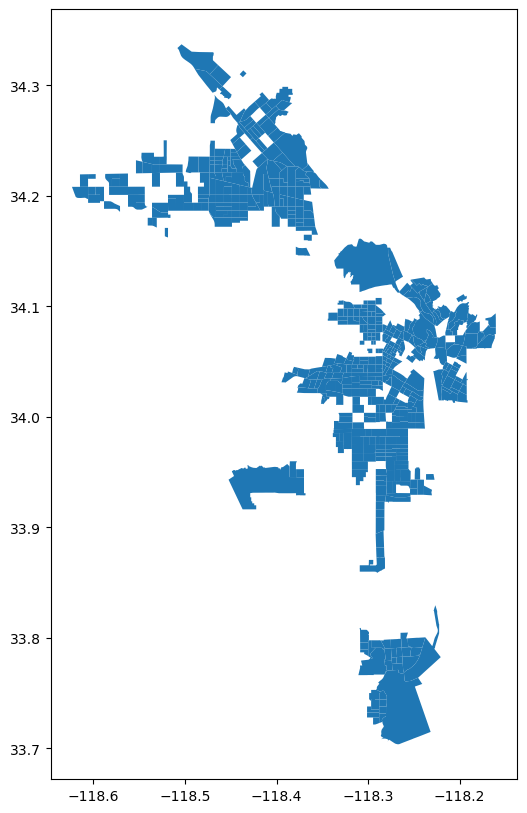

In [45]:
lac_dac.plot(figsize=(12,10))

This was an experiment in using city-only census tracts on a county-wide geodataframe and the initial plot looks good. Next steps for a future assignment will be to add a background map and markers for LA city cooling center locations.

My next attempt will try to plot cooling center locations onto a folium map.

I start by importing folium, followed by a new shapefile with LA cooling centers data.

In [46]:
import folium

In [90]:
cooling = gpd.read_file('data/Cooling_Heating_Centers_City_of_Los_Angeles.zip')

In [91]:
cooling.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    31 non-null     int64   
 1   GlobalID    31 non-null     object  
 2   FacilityNa  30 non-null     object  
 3   IndoorOutd  15 non-null     object  
 4   Address     30 non-null     object  
 5   Bureau      29 non-null     object  
 6   CouncilDis  29 non-null     object  
 7   AltFacPhon  0 non-null      object  
 8   geometry    31 non-null     geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 2.3+ KB


In [92]:
cooling.head(5)

,OBJECTID,GlobalID,FacilityNa,IndoorOutd,Address,Bureau,CouncilDis,AltFacPhon,geometry
0,64,19c09964-74b3-47b8-b213-6b2415619201,Canoga Park Senior Citizen Center,Indoor,"7326 Jordan Ave, Canoga Park, CA, 91303, USA",Valley,03,None,POINT (-118.60264 34.20372)
1,65,078b0c25-92be-47d8-ab89-0cd8194693a1,Sherman Oaks East Valley Adult Center,None,"5056 Van Nuys Blvd. Sherman Oaks, CA 91403",Valley,04,None,POINT (-118.44812 34.16318)
2,66,8679f582-4287-4746-b802-afaebdfabdfd,Woodland Hills Recreation Center,None,"5858 Shoup Ave., Woodland Hills, CA 91367",Valley,03,None,POINT (-118.61252 34.17636)
3,67,884db8bd-e2cb-4a80-9eaa-d13e896183bb,North Hollywood Senior Center,None,"11430 Chandler Blvd., North Hollywood, CA 91601",Valley,02,None,POINT (-118.37944 34.16773)
4,68,4136e594-5cb1-48be-9e51-28edbac3b9ad,Sunland Senior Center,None,"8651 Foothill Blvd., Sunland, CA 91040",Valley,07,None,POINT (-118.32149 34.26122)


The shapefile contains lat and long coordinates under one column. Here I try to troubleshoot how to separate the coordinates out into two columns:

In [114]:
from shapely import wkt
cooling['str_geom'] = cooling.geometry.apply(lambda x: wkt.dumps(x))

In [115]:
cooling.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    31 non-null     int64   
 1   GlobalID    31 non-null     object  
 2   FacilityNa  30 non-null     object  
 3   IndoorOutd  15 non-null     object  
 4   Address     30 non-null     object  
 5   Bureau      29 non-null     object  
 6   CouncilDis  29 non-null     object  
 7   AltFacPhon  0 non-null      object  
 8   geometry    31 non-null     geometry
 9   str_geom    31 non-null     object  
dtypes: geometry(1), int64(1), object(8)
memory usage: 2.5+ KB


A new column called str_geom was created as an object.

In [116]:
cooling.head()

,OBJECTID,GlobalID,FacilityNa,IndoorOutd,Address,Bureau,CouncilDis,AltFacPhon,geometry,str_geom
0,64,19c09964-74b3-47b8-b213-6b2415619201,Canoga Park Senior Citizen Center,Indoor,"7326 Jordan Ave, Canoga Park, CA, 91303, USA",Valley,03,None,POINT (-118.60264 34.20372),POINT (-118.6026430871369968 34.2037247381764971)
1,65,078b0c25-92be-47d8-ab89-0cd8194693a1,Sherman Oaks East Valley Adult Center,None,"5056 Van Nuys Blvd. Sherman Oaks, CA 91403",Valley,04,None,POINT (-118.44812 34.16318),POINT (-118.4481150162159935 34.1631756817657006)
2,66,8679f582-4287-4746-b802-afaebdfabdfd,Woodland Hills Recreation Center,None,"5858 Shoup Ave., Woodland Hills, CA 91367",Valley,03,None,POINT (-118.61252 34.17636),POINT (-118.6125151986470030 34.1763591579253969)
3,67,884db8bd-e2cb-4a80-9eaa-d13e896183bb,North Hollywood Senior Center,None,"11430 Chandler Blvd., North Hollywood, CA 91601",Valley,02,None,POINT (-118.37944 34.16773),POINT (-118.3794367713529994 34.1677276558060967)
4,68,4136e594-5cb1-48be-9e51-28edbac3b9ad,Sunland Senior Center,None,"8651 Foothill Blvd., Sunland, CA 91040",Valley,07,None,POINT (-118.32149 34.26122),POINT (-118.3214877195739945 34.2612190105157026)


Next, I try to separate the new string column with this code found on stack overflow:

In [120]:
cooling['str_geom'].str.strip('()')                               \
                   .str.split(', ', expand=True)                   \
                   .rename(columns={0:'Latitude', 1:'Longitude'}) 

,Latitude
0,POINT (-118.6026430871369968 34.2037247381764971
1,POINT (-118.4481150162159935 34.1631756817657006
2,POINT (-118.6125151986470030 34.1763591579253969
3,POINT (-118.3794367713529994 34.1677276558060967
4,POINT (-118.3214877195739945 34.2612190105157026
5,POINT (-118.5487250221599993 34.2333138699223980
6,POINT (-118.4578369047339947 34.2299039259440008
7,POINT (-118.2146134115919978 34.0722695507943030
8,POINT (-118.1848613588879999 34.1142259310886971
9,POINT (-118.2476074129340020 33.9946325618995999


In [122]:
cooling.sample()

,OBJECTID,GlobalID,FacilityNa,IndoorOutd,Address,Bureau,CouncilDis,AltFacPhon,geometry,str_geom
7,71,d929391d-e7b3-4dae-959d-f75748cbbbfe,Lincoln Heights SCC,None,"2303 Workman Street Los Angeles, 90031",Central,01,None,POINT (-118.21461 34.07227),POINT (-118.2146134115919978 34.0722695507943030)


The example on stack overflow produced two columns for the coordinates, but I am left still left with only one. I don't know how to identify the problem yet, so I will just add a basic plot for now and return to this next week.

<AxesSubplot: >

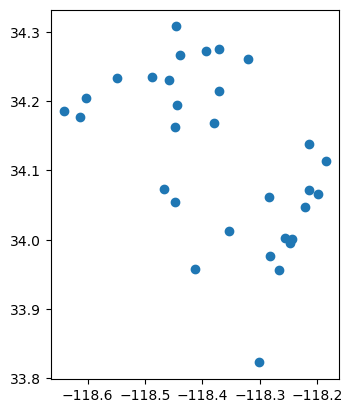

In [101]:
cooling.plot()